In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split,learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df= pd.read_csv('../csv/after_cleaning/mubawab_preprocessed.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,26.0,88,2,1,9,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100,2,1,9,1,0.0,0.0,0.0,1.0,135000.0
2,36.0,152,2,1,9,1,0.0,0.0,0.0,1.0,680000.0
3,36.0,120,1,1,9,1,0.0,0.0,0.0,1.0,470000.0
4,31.0,145,3,1,11,4,0.0,0.0,0.0,1.0,260000.0


**scaling and train test split**

In [4]:
X= df.drop(columns='prix')

y= df['prix']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# KNN

In [26]:
knn_regressor = KNeighborsRegressor()

# Set up the parameter grid for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}  # You can adjust the range as needed

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best number of neighbors and the corresponding best score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f'Best number of neighbors: {best_n_neighbors}')
print(f'Best score: {best_score}')

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best number of neighbors: 22
Best score: 0.5390515320220979


/home/lost-elf/Apartments-Sales/venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [29]:
knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train_scaled, y_train)

y_hat= knn_regressor.predict(X_test_scaled)

In [30]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 116670.35172895565
Root Mean Squared Error (RMSE): 198246.48292199918
Mean Squared Error (MSE): 39301667990.94251
Mean Absolute Percentage Error (MAPE): 0.2884691671740905
R²: 0.635667537580185


**R² is around 63% , this means that LR model explains about 63% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**learning curve**

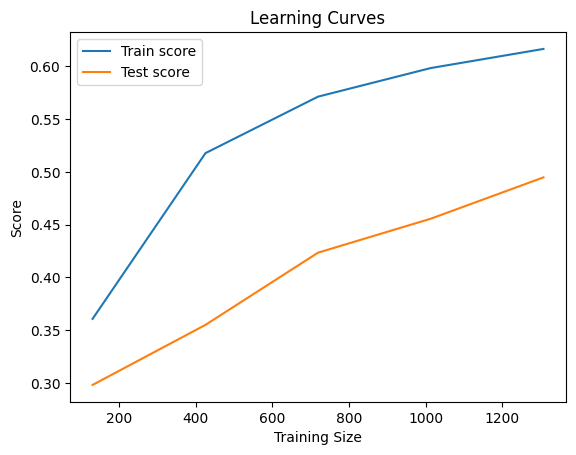

In [35]:

train_sizes, train_scores, test_scores = learning_curve(knn_regressor, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
